In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

RANDOM_STATE = 42

def plot_decision_boundary(model, X, y, title="", h=0.02):
    """
    Plots the decision boundary of a fitted classifier on 2D data.
    Works with sklearn Pipelines (predict on original X).
    """
    x_min, x_max = X[:, 0].min() - 1.0, X[:, 0].max() + 1.0
    y_min, y_max = X[:, 1].min() - 1.0, X[:, 1].max() + 1.0
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(grid).reshape(xx.shape)

    plt.figure(figsize=(6.5, 5.5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor="k")
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.tight_layout()
    plt.show()


In [3]:
X_blobs, y_blobs = make_blobs(
    n_samples=400, centers=2, cluster_std=2.0, random_state=RANDOM_STATE
)
Xb_train, Xb_test, yb_train, yb_test = train_test_split(
    X_blobs, y_blobs, test_size=0.30, stratify=y_blobs, random_state=RANDOM_STATE
)

X_moons, y_moons = make_moons(
    n_samples=500, noise=0.20, random_state=RANDOM_STATE
)
Xm_train, Xm_test, ym_train, ym_test = train_test_split(
    X_moons, y_moons, test_size=0.30, stratify=y_moons, random_state=RANDOM_STATE
)

print("Blobs -> Train/Test:", Xb_train.shape, Xb_test.shape)
print("Moons -> Train/Test:", Xm_train.shape, Xm_test.shape)


Blobs -> Train/Test: (280, 2) (120, 2)
Moons -> Train/Test: (350, 2) (150, 2)


In [5]:
svm_linear = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="linear", C=1.0))
])
svm_linear.fit(Xb_train, yb_train)

svm_rbf = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf", C=1.0, gamma="scale"))
])
svm_rbf.fit(Xm_train, ym_train)

print("Models trained.")


Models trained.


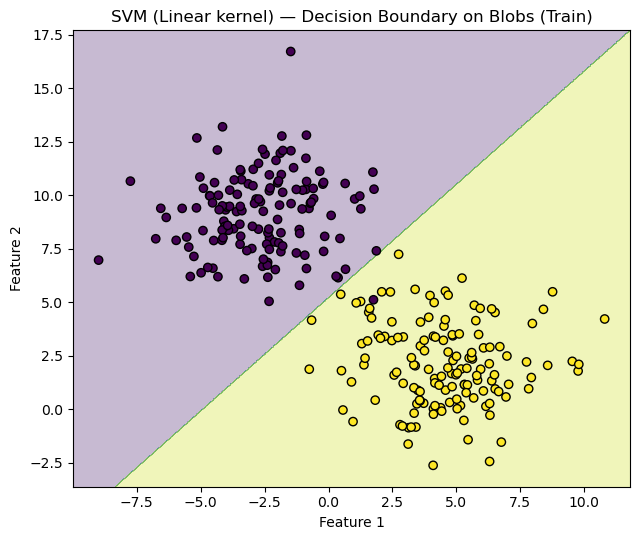

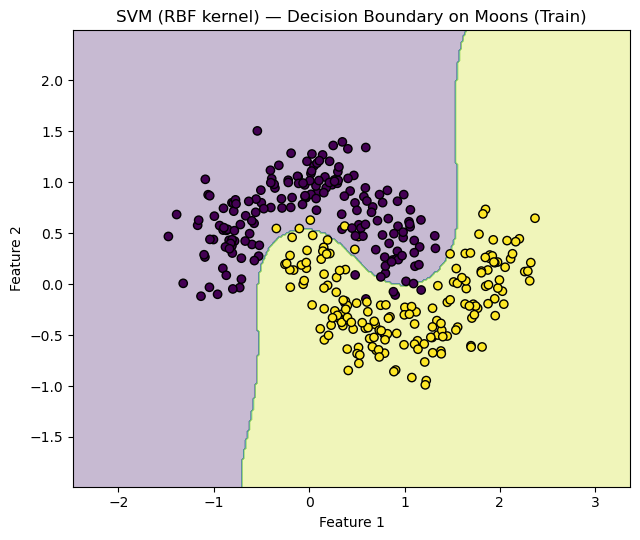

In [7]:
plot_decision_boundary(svm_linear, Xb_train, yb_train,
                       title="SVM (Linear kernel) — Decision Boundary on Blobs (Train)")

plot_decision_boundary(svm_rbf, Xm_train, ym_train,
                       title="SVM (RBF kernel) — Decision Boundary on Moons (Train)")


In [9]:
yb_pred = svm_linear.predict(Xb_test)
print("Blobs — Linear SVM")
print("Test Accuracy:", accuracy_score(yb_test, yb_pred))
print("Classification Report:\n", classification_report(yb_test, yb_pred))
print("Confusion Matrix:\n", confusion_matrix(yb_test, yb_pred))

ym_pred = svm_rbf.predict(Xm_test)
print("\nMoons — RBF SVM")
print("Test Accuracy:", accuracy_score(ym_test, ym_pred))
print("Classification Report:\n", classification_report(ym_test, ym_pred))
print("Confusion Matrix:\n", confusion_matrix(ym_test, ym_pred))


Blobs — Linear SVM
Test Accuracy: 0.9916666666666667
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99        60
           1       0.98      1.00      0.99        60

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

Confusion Matrix:
 [[59  1]
 [ 0 60]]

Moons — RBF SVM
Test Accuracy: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.97      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Confusion Matrix:
 [[75  0]
 [ 2 73]]


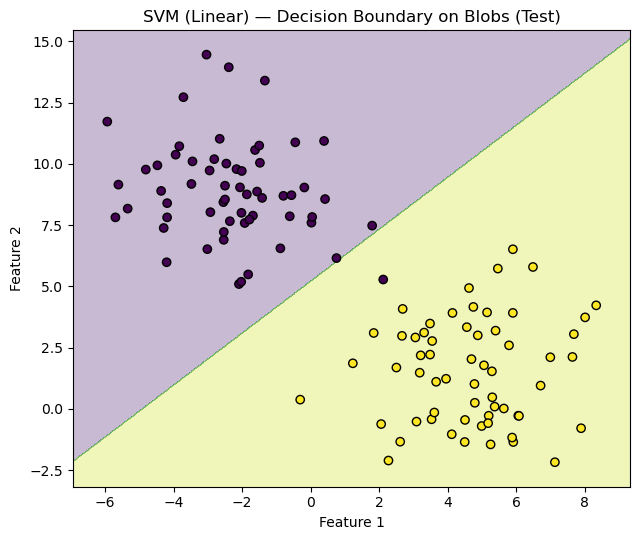

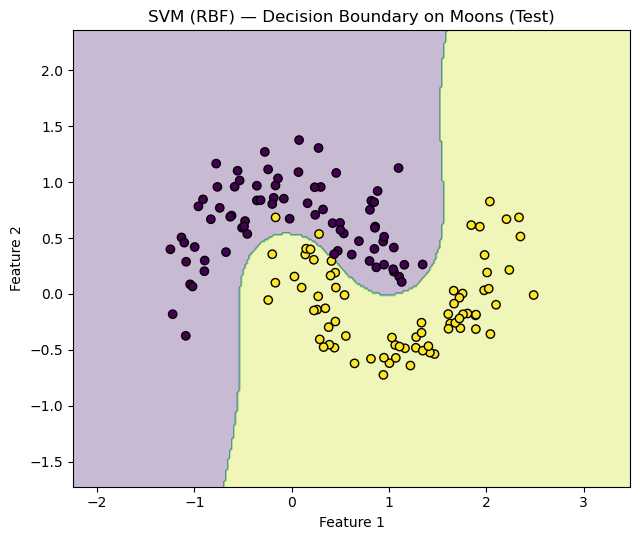

In [11]:
plot_decision_boundary(svm_linear, Xb_test, yb_test,
                       title="SVM (Linear) — Decision Boundary on Blobs (Test)")

plot_decision_boundary(svm_rbf, Xm_test, ym_test,
                       title="SVM (RBF) — Decision Boundary on Moons (Test)")


In [13]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)


scores_linear = cross_val_score(svm_linear, X_blobs, y_blobs, cv=cv, scoring="accuracy")
print("Blobs — Linear SVM CV Accuracies:", scores_linear)
print("Mean ± Std:", scores_linear.mean(), "±", scores_linear.std())

scores_rbf = cross_val_score(svm_rbf, X_moons, y_moons, cv=cv, scoring="accuracy")
print("\nMoons — RBF SVM CV Accuracies:", scores_rbf)
print("Mean ± Std:", scores_rbf.mean(), "±", scores_rbf.std())


Blobs — Linear SVM CV Accuracies: [0.975  0.9625 1.     1.     1.    ]
Mean ± Std: 0.9875 ± 0.015811388300841892

Moons — RBF SVM CV Accuracies: [0.96 0.96 0.98 0.96 0.99]
Mean ± Std: 0.97 ± 0.012649110640673528


Best Params: {'clf__C': 10, 'clf__gamma': 1.0}
Best CV Accuracy: 0.9800000000000001

Tuned RBF SVM — Test Accuracy: 0.9866666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        75
           1       0.99      0.99      0.99        75

    accuracy                           0.99       150
   macro avg       0.99      0.99      0.99       150
weighted avg       0.99      0.99      0.99       150

Confusion Matrix:
 [[74  1]
 [ 1 74]]


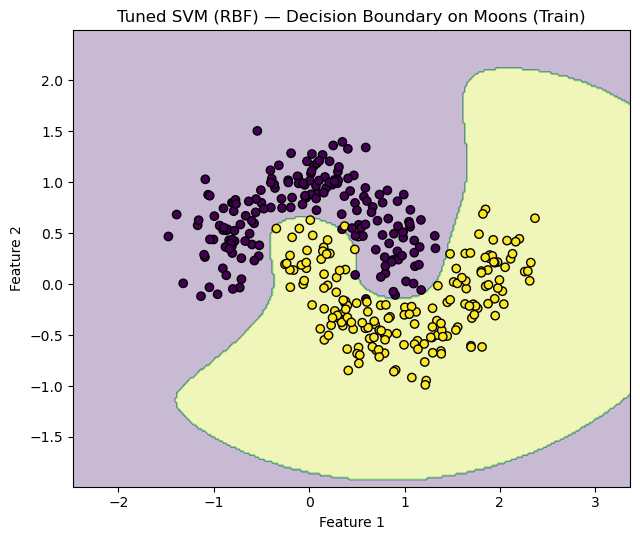

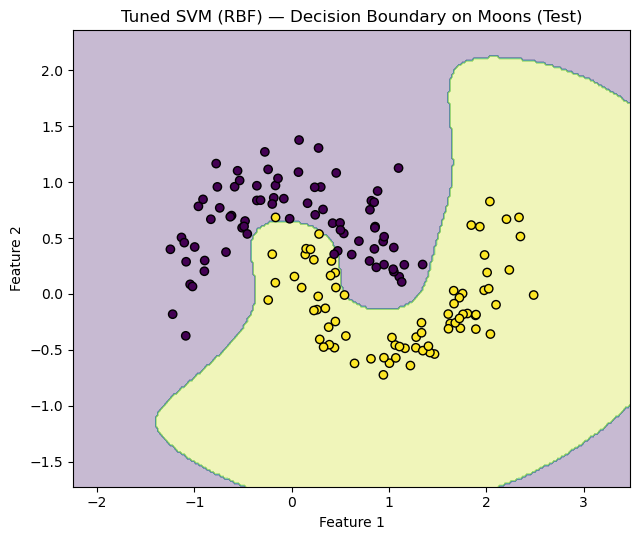

In [15]:
svm_rbf_base = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(kernel="rbf"))
])

param_grid = {
    "clf__C":    [0.1, 1, 10, 100],
    "clf__gamma": ["scale", 1.0, 0.1, 0.01, 0.001]
}

grid = GridSearchCV(
    estimator=svm_rbf_base,
    param_grid=param_grid,
    scoring="accuracy",
    cv=cv,
    n_jobs=-1,
    refit=True,
    verbose=0
)

grid.fit(Xm_train, ym_train)

print("Best Params:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)

best_rbf = grid.best_estimator_

ym_best_pred = best_rbf.predict(Xm_test)
print("\nTuned RBF SVM — Test Accuracy:", accuracy_score(ym_test, ym_best_pred))
print("Classification Report:\n", classification_report(ym_test, ym_best_pred))
print("Confusion Matrix:\n", confusion_matrix(ym_test, ym_best_pred))


plot_decision_boundary(best_rbf, Xm_train, ym_train,
                       title="Tuned SVM (RBF) — Decision Boundary on Moons (Train)")
plot_decision_boundary(best_rbf, Xm_test, ym_test,
                       title="Tuned SVM (RBF) — Decision Boundary on Moons (Test)")


In [16]:
n_sv_linear = svm_linear.named_steps["clf"].n_support_
n_sv_rbf    = svm_rbf.named_steps["clf"].n_support_
print("Support vectors per class — Linear SVM:", n_sv_linear)
print("Support vectors per class — RBF SVM:", n_sv_rbf)


Support vectors per class — Linear SVM: [9 8]
Support vectors per class — RBF SVM: [41 42]
